Association Rule Project

**Goal**: The objective of this project is to build a recommendation system. While this has already been done often, what we will be trying to do is recommend netflix shows based on movie choices 

In [3]:
import kagglehub
import pandas as pd

In [5]:
# Download and extract the dataset
netflix_shows_path = kagglehub.dataset_download('shivamb/netflix-shows')

# Load the dataset into a DataFrame
movie_data = pd.read_csv(netflix_shows_path + '/netflix_titles.csv', low_memory=False)


100%|██████████| 1.34M/1.34M [00:00<00:00, 2.38MB/s]

Extracting files...


In [6]:
movie_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
import os
import kagglehub
import pandas as pd
import re

# Step 1: Download the dataset
path = kagglehub.dataset_download("blessondensil294/friends-tv-series-screenplay-script")

print("Path to dataset files:", path)


Path to dataset files: /Users/rajat/.cache/kagglehub/datasets/blessondensil294/friends-tv-series-screenplay-script/versions/1


In [21]:

# Step 2: List all text files in the downloaded folder
script_files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Regular expression patterns for scenes and actors
scene_pattern = r"\[Scene: (.*?)\]"
actor_pattern = r"([A-Z][a-z]+):"  # Only capture words starting with capital letter followed by lowercase letters

# List to store scene and actor data
scene_data = []
all_actors = set()

# Step 3: Process each script file
for script_file in script_files:
    with open(os.path.join(path, script_file), 'r', encoding='utf-8') as file:
        script_text = file.read()

        # Split script into scenes by looking for [Scene: ]
        scenes = script_text.split('[Scene:')

        # Process each scene
        for i, scene in enumerate(scenes[1:], start=1):
            scene_info = {}
            scene_info['scene_number'] = i
            scene_info['script_file'] = script_file  # To identify which script the scene belongs to

            # Extract actors from the scene
            actors = re.findall(actor_pattern, scene)
            scene_info['actors'] = actors

            # Update all_actors set to keep track of unique actor names
            all_actors.update(actors)

            scene_data.append(scene_info)

# Step 4: Create a DataFrame
all_actors = sorted(list(all_actors))  # Sort actors to maintain consistent column order

# Create a matrix for the scene data
scene_matrix = []

for scene_info in scene_data:
    scene_row = [scene_info['scene_number'], scene_info['script_file']]
    
    # For each actor, mark if they are present in the scene
    for actor in all_actors:
        scene_row.append(1 if actor in scene_info['actors'] else 0)
    
    scene_matrix.append(scene_row)

# Create pandas DataFrame
df = pd.DataFrame(scene_matrix, columns=['scene_number', 'script_file'] + all_actors)

# Step 5: Display the DataFrame
print(df.head())  # Show the first few rows to verify the result




   scene_number                      script_file  Actor  Adrienne  Agent  \
0             1  S09E17 The Memorial Service.txt      0         0      0   
1             2  S09E17 The Memorial Service.txt      0         0      0   
2             3  S09E17 The Memorial Service.txt      0         0      0   
3             4  S09E17 The Memorial Service.txt      0         0      0   
4             5  S09E17 The Memorial Service.txt      0         0      0   

   Alan  Alex  Alexander  Alice  All  ...  Williams  Witch  Woman  Worker  \
0     0     0          0      0    0  ...         0      0      0       0   
1     0     0          0      0    0  ...         0      0      0       0   
2     0     0          0      0    0  ...         0      0      0       0   
3     0     0          0      0    0  ...         0      0      0       0   
4     0     0          0      0    0  ...         0      0      0       0   

   Writer  Zack  Zane  Zellner  Zelner  Zoe  
0       0     0     0        0    

In [30]:
# Count how many times each actor appears across all scenes
actor_appearance_count = df.drop(['scene_number', 'script_file'], axis=1).sum()

# Keep actors who appear more than 100 times
actors_to_keep = actor_appearance_count[actor_appearance_count > 20].index.tolist()

# Filter the DataFrame to include only the relevant actors
filtered_df = df[['scene_number', 'script_file'] + actors_to_keep]

# Display the filtered DataFrame
print(filtered_df.tail())  # Show the first few rows



      scene_number           script_file  All  Carol  Chandler  Charlie  \
3045            17  S01E23 The Birth.txt    0      1         1        0   
3046            18  S01E23 The Birth.txt    0      0         0        0   
3047            19  S01E23 The Birth.txt    1      1         1        0   
3048            20  S01E23 The Birth.txt    0      1         1        0   
3049            21  S01E23 The Birth.txt    1      0         1        0   

      Director  Emily  Geller  Gunther  ...  Mike  Monica  Nurse  Phoebe  \
3045         0      0       0        0  ...     0       1      1       0   
3046         0      0       0        0  ...     0       0      0       1   
3047         0      0       0        0  ...     0       0      1       1   
3048         0      0       0        0  ...     0       1      0       1   
3049         0      0       0        0  ...     0       1      0       1   

      Rachel  Richard  Ross  Susan  Tag  Woman  
3045       1        0     0      0    0    

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   scene_number  3050 non-null   int64 
 1   script_file   3050 non-null   object
 2   All           3050 non-null   int64 
 3   Carol         3050 non-null   int64 
 4   Chandler      3050 non-null   int64 
 5   Charlie       3050 non-null   int64 
 6   Director      3050 non-null   int64 
 7   Emily         3050 non-null   int64 
 8   Geller        3050 non-null   int64 
 9   Gunther       3050 non-null   int64 
 10  Guy           3050 non-null   int64 
 11  Janice        3050 non-null   int64 
 12  Joey          3050 non-null   int64 
 13  Man           3050 non-null   int64 
 14  Mike          3050 non-null   int64 
 15  Monica        3050 non-null   int64 
 16  Nurse         3050 non-null   int64 
 17  Phoebe        3050 non-null   int64 
 18  Rachel        3050 non-null   int64 
 19  Richar

In [31]:
# Remove unwanted columns: "Director", "All", "Guy", "Woman", "Geller"
columns_to_remove = ['Director', 'All', 'Guy', 'Woman', 'Geller', 'Nurse']
filtered_df = filtered_df.drop(columns=columns_to_remove, errors='ignore')

# Display the filtered DataFrame after removing specified columns
print(filtered_df.head())  # Show the first few rows


   scene_number                      script_file  Carol  Chandler  Charlie  \
0             1  S09E17 The Memorial Service.txt      0         1        0   
1             2  S09E17 The Memorial Service.txt      0         0        0   
2             3  S09E17 The Memorial Service.txt      0         1        0   
3             4  S09E17 The Memorial Service.txt      0         0        0   
4             5  S09E17 The Memorial Service.txt      0         1        0   

   Emily  Gunther  Janice  Joey  Man  Mike  Monica  Phoebe  Rachel  Richard  \
0      0        0       0     1    0     0       0       0       0        0   
1      0        0       0     1    0     0       0       0       1        0   
2      0        0       0     0    0     0       1       1       0        0   
3      0        0       0     1    0     0       0       0       1        0   
4      0        0       0     0    0     0       1       0       0        0   

   Ross  Susan  Tag  
0     1      0    0  
1     0     

In [35]:
filtered_df.head()

,scene_number,script_file,Carol,Chandler,Charlie,Emily,Gunther,Janice,Joey,Man,Mike,Monica,Phoebe,Rachel,Richard,Ross,Susan,Tag
0,1,S09E17 The Memorial Service.txt,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,S09E17 The Memorial Service.txt,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3,S09E17 The Memorial Service.txt,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
3,4,S09E17 The Memorial Service.txt,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,S09E17 The Memorial Service.txt,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [36]:
# Exclude non-character columns
character_columns = filtered_df.columns.difference(['scene_number', 'script_file'])

# Count the number of dialogue occurrences per character per scene
dialogue_counts = filtered_df[character_columns].sum(axis=0)

# Sort characters by the number of lines
dialogue_counts_sorted = dialogue_counts.sort_values(ascending=False)

# Display results
print(dialogue_counts_sorted)

Chandler    1356
Joey        1316
Rachel      1314
Monica      1292
Ross        1259
Phoebe      1207
Gunther       63
Mike          60
Janice        44
Carol         38
Charlie       33
Emily         31
Man           31
Susan         27
Tag           27
Richard       23
dtype: int64


In [43]:
import pandas as pd
from itertools import combinations

In [44]:
# Drop unnecessary columns
df_transformed = filtered_df.drop(columns=['scene_number', 'script_file'])

# Convert binary values (1 or 0) to boolean (True for 1, False for 0)
df_transformed = df_transformed.apply(lambda x: x == 1)

# Create a list of all scenes, each scene is a list of characters who spoke
scenes = df_transformed.values.tolist()

# Now we can generate the co-occurrence matrix
co_occurrence = {}

# Iterate through all scenes
for scene in scenes:
    # Get all pairs of characters that appear in the scene
    pairs = combinations([i for i, x in enumerate(scene) if x], 2)  # Only consider 'True' (1) values
    for pair in pairs:
        pair = tuple(sorted(pair))  # Sort to avoid duplicate pairs
        if pair in co_occurrence:
            co_occurrence[pair] += 1
        else:
            co_occurrence[pair] = 1

# Convert co_occurrence dictionary to a DataFrame
co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['pair', 'count'])

# Show top pairs by co-occurrence count
co_occurrence_df.sort_values(by='count', ascending=False).head(10)


,pair,count
4,"(1, 9)",888
0,"(1, 6)",818
13,"(11, 13)",759
6,"(9, 10)",738
11,"(9, 11)",706
12,"(10, 11)",691
1,"(1, 13)",668
3,"(6, 11)",663
14,"(6, 9)",656
2,"(6, 13)",649


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert the scene data into transactions for the Apriori algorithm
transactions = []

for scene in scenes:
    # Get all characters who spoke in the scene
    transaction = [df_transformed.columns[i] for i, x in enumerate(scene) if x]
    transactions.append(transaction)

# Apply TransactionEncoder to get the appropriate format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to DataFrame for Apriori
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter rules with high lift and confidence
high_lift_rules = rules[rules['lift'] > 1.5]
high_confidence_rules = rules[rules['confidence'] > 0.7]

# Display the high-lift rules
print(high_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Display the high-confidence rules
print(high_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


    antecedents                               consequents   support  \
0        (Ross)                                   (Carol)  0.011475   
1       (Carol)                                    (Ross)  0.011475   
4      (Janice)                                (Chandler)  0.011148   
5    (Chandler)                                  (Janice)  0.011148   
8      (Monica)                                (Chandler)  0.291148   
..          ...                                       ...       ...   
611  (Chandler)      (Joey, Monica, Phoebe, Rachel, Ross)  0.089836   
612    (Monica)    (Joey, Chandler, Phoebe, Rachel, Ross)  0.089836   
613    (Phoebe)    (Joey, Chandler, Monica, Rachel, Ross)  0.089836   
614    (Rachel)    (Joey, Chandler, Monica, Phoebe, Ross)  0.089836   
615      (Ross)  (Joey, Chandler, Monica, Phoebe, Rachel)  0.089836   

     confidence      lift  
0      0.027800  2.231303  
1      0.921053  2.231303  
4      0.772727  1.738067  
5      0.025074  1.738067  
8      

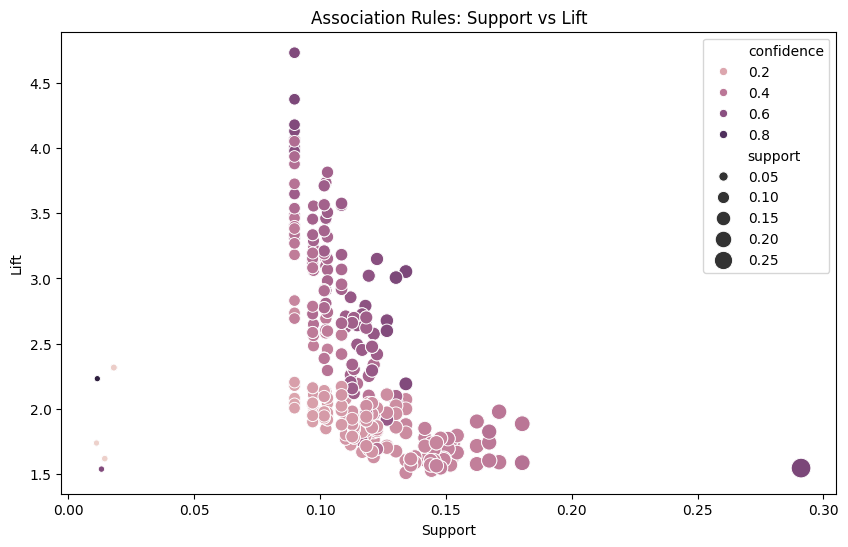

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the support vs. lift of the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', data=high_lift_rules, hue='confidence', size='support', sizes=(20, 200))
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()


In [41]:
# Filter rules with high lift and confidence
high_lift_rules = rules[rules['lift'] > 1.5]  # Example threshold for lift
high_confidence_rules = rules[rules['confidence'] > 0.7]  # Example threshold for confidence

# Display high lift rules
print(high_lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Display high confidence rules
print(high_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
   antecedents consequents   support  confidence  lift
0          (0)         ( )  1.000000    1.000000   1.0
1          ( )         (0)  1.000000    1.000000   1.0
2          (1)         ( )  0.913115    1.000000   1.0
3          ( )         (1)  0.913115    0.913115   1.0
4          (1)         (0)  0.913115    1.000000   1.0
5          (0)         (1)  0.913115    0.913115   1.0
6       (1, 0)         ( )  0.913115    1.000000   1.0
7       (1,  )         (0)  0.913115    1.000000   1.0
8       (0,  )         (1)  0.913115    0.913115   1.0
9          (1)      (0,  )  0.913115    1.000000   1.0
10         (0)      (1,  )  0.913115    0.913115   1.0
11         ( )      (1, 0)  0.913115    0.913115   1.0


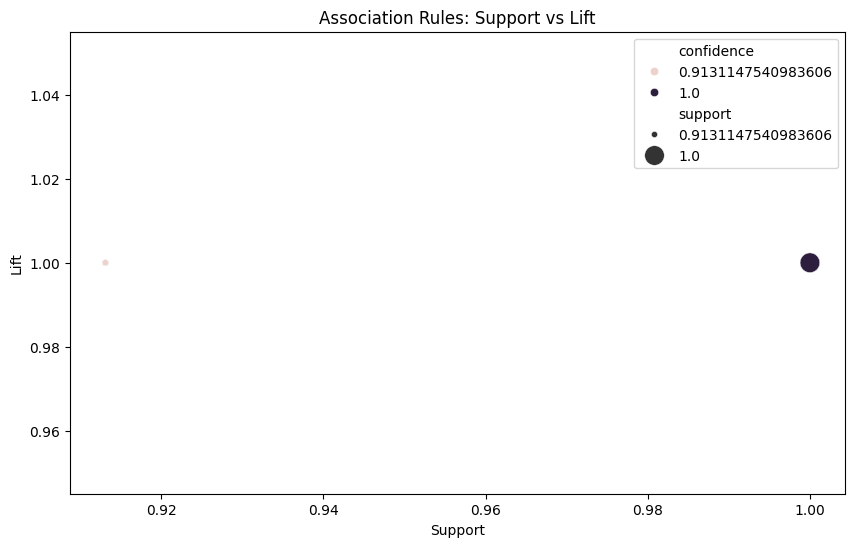

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the support vs. lift of the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', data=rules, hue='confidence', size='support', sizes=(20, 200))
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()


In [47]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming your dataset is loaded into a pandas dataframe `df`
# Convert each scene's characters to a list of 'items'
transactions = filtered_df.drop(['scene_number', 'script_file'], axis=1).apply(lambda x: x.index[x == 1].tolist(), axis=1).tolist()

# Use TransactionEncoder to encode the transaction data
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)

# Convert to DataFrame for easier handling
trans_df = pd.DataFrame(te_ary, columns=te.columns_)

# Show summary
print(trans_df.shape)  # Prints the number of transactions and items
print(trans_df.head())  # Shows the first few rows


(3050, 16)
   Carol  Chandler  Charlie  Emily  Gunther  Janice   Joey    Man   Mike  \
0  False      True    False  False    False   False   True  False  False   
1  False     False    False  False    False   False   True  False  False   
2  False      True    False  False    False   False  False  False  False   
3  False     False    False  False    False   False   True  False  False   
4  False      True    False  False    False   False  False  False  False   

   Monica  Phoebe  Rachel  Richard   Ross  Susan    Tag  
0   False   False   False    False   True  False  False  
1   False   False    True    False  False  False  False  
2    True    True   False    False   True  False  False  
3   False   False    True    False  False  False  False  
4    True   False   False    False   True  False  False  


In [48]:
sample_df = trans_df.sample(frac=0.05, random_state=42)
print(sample_df.shape)  # Show the shape of the sample dataframe


(152, 16)


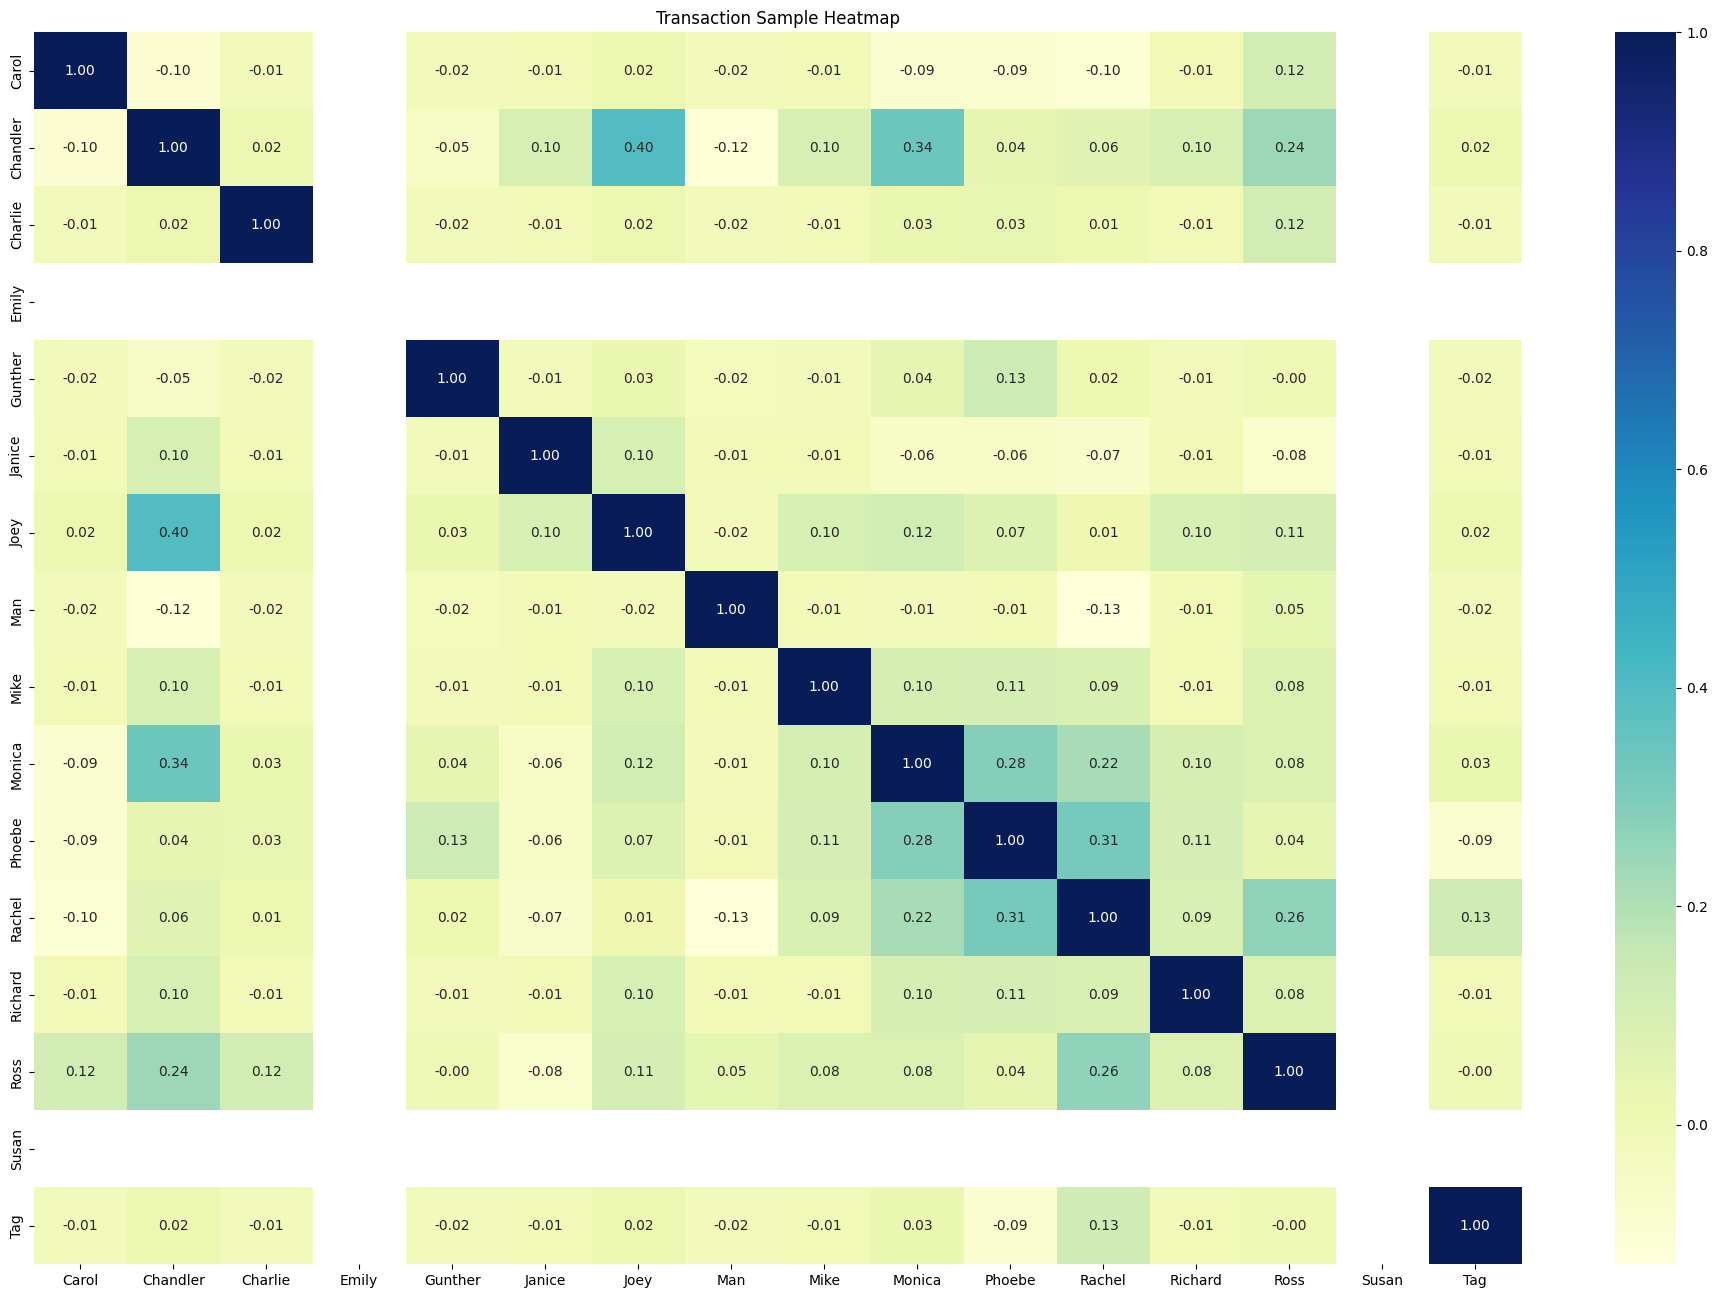

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the sample transaction data as a heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(sample_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Transaction Sample Heatmap")
plt.show()


In [52]:
sample_df

,Carol,Chandler,Charlie,Emily,Gunther,Janice,Joey,Man,Mike,Monica,Phoebe,Rachel,Richard,Ross,Susan,Tag
1517,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2369,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
1961,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
343,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2663,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
463,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1423,False,True,False,False,False,False,True,False,False,True,True,True,False,True,False,False
1177,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


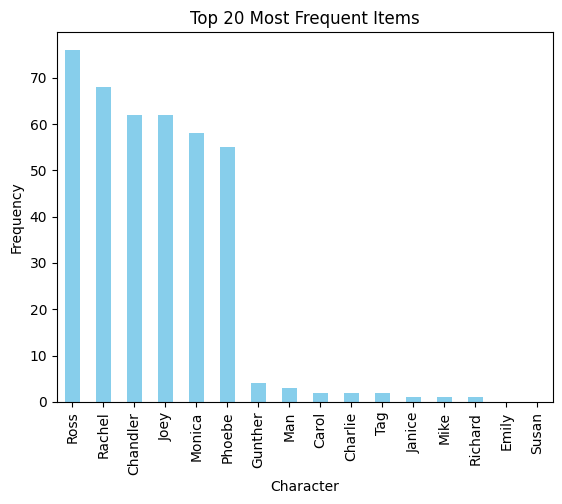

In [54]:
# Sum up the occurrences for characters
item_freq = sample_df.sum().sort_values(ascending=False)

# Plot top 20 frequent items
item_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Items')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/var/folders/yb/yccw901n49qckq1d4dzj8cgh0000gn/T/ipykernel_14873/4269519966.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=itemset_sizes, palette='Blues')


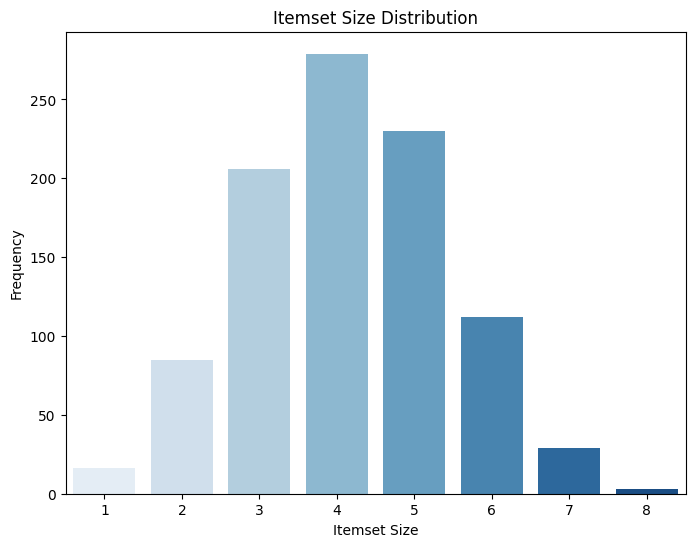

In [67]:
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import seaborn as sns

df_bin = filtered_df.drop(columns=['scene_number', 'script_file']).applymap(lambda x: 1 if x > 0 else 0)

# Run apriori algorithm
frequent_itemsets = apriori(df_bin, min_support=0.00008, use_colnames=True)

# Calculate the itemset sizes
itemset_sizes = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Plot the distribution of itemset sizes
plt.figure(figsize=(8, 6))
sns.countplot(x=itemset_sizes, palette='Blues')
plt.title('Itemset Size Distribution')
plt.xlabel('Itemset Size')
plt.ylabel('Frequency')
plt.show()


In [68]:
# Inspect itemsets where the size is greater than 5
large_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 5]
print(large_itemsets)


      support                                           itemsets
816  0.000328    (Joey, Chandler, Monica, Phoebe, Rachel, Carol)
817  0.000984      (Joey, Chandler, Monica, Phoebe, Carol, Ross)
818  0.000984     (Joey, Chandler, Monica, Phoebe, Carol, Susan)
819  0.000656      (Joey, Chandler, Monica, Rachel, Carol, Ross)
820  0.000656     (Joey, Chandler, Monica, Rachel, Carol, Susan)
..        ...                                                ...
955  0.000328  (Joey, Monica, Gunther, Phoebe, Rachel, Emily,...
956  0.000328  (Joey, Mike, Monica, Gunther, Phoebe, Rachel, ...
957  0.000328  (Joey, Chandler, Monica, Phoebe, Rachel, Carol...
958  0.000328  (Joey, Chandler, Monica, Gunther, Phoebe, Rach...
959  0.000328  (Joey, Chandler, Mike, Monica, Gunther, Phoebe...

[144 rows x 2 columns]


In [69]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply apriori algorithm
frequent_itemsets = apriori(df_bin, min_support=0.00008, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Show the rules
print(rules)


/usr/local/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                  antecedents                                     consequents  \
0                     (Carol)                                          (Ross)   
1                     (Susan)                                         (Carol)   
2                     (Carol)                                         (Susan)   
3                   (Gunther)                                      (Chandler)   
4                    (Janice)                                      (Chandler)   
...                       ...                                             ...   
7078  (Mike, Gunther, Monica)          (Joey, Chandler, Phoebe, Rachel, Ross)   
7079  (Mike, Gunther, Phoebe)          (Joey, Chandler, Monica, Rachel, Ross)   
7080  (Mike, Gunther, Rachel)          (Joey, Chandler, Monica, Phoebe, Ross)   
7081    (Mike, Gunther, Ross)        (Joey, Chandler, Monica, Phoebe, Rachel)   
7082          (Mike, Gunther)  (Joey, Chandler, Monica, Phoebe, Rachel, Ross)   

      antecedent support  c

In [75]:
# Convert frequent_itemsets to a dictionary for quick lookups
itemsets_dict = frequent_itemsets.set_index('itemsets')['support'].to_dict()

# Add lhs_support and rhs_support to the rules
rules['lhs_support'] = rules['antecedents'].apply(lambda x: itemsets_dict.get(frozenset(x), 0))
rules['rhs_support'] = rules['consequents'].apply(lambda x: itemsets_dict.get(frozenset(x), 0))

# Subset rules
rules_sub = rules


# Calculate Kulczynski measure
rules_sub['kulczynski'] = (
    (rules_sub['support'] / rules_sub['lhs_support']) + 
    (rules_sub['support'] / rules_sub['rhs_support'])
) / 2

# Display top 5 rules by Kulczynski
top_rules = rules_sub.sort_values('kulczynski', ascending=False).head(5)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski']])


                          antecedents                      consequents  \
3821                    (Joey, Susan)  (Ross, Monica, Carol, Chandler)   
3803  (Ross, Monica, Carol, Chandler)                    (Joey, Susan)   
1629                    (Joey, Susan)          (Ross, Carol, Chandler)   
1625          (Ross, Carol, Chandler)                    (Joey, Susan)   
1725            (Ross, Phoebe, Carol)                (Susan, Chandler)   

       support  confidence        lift  kulczynski  
3821  0.001311    0.800000  488.000000    0.800000  
3803  0.001311    0.800000  488.000000    0.800000  
1629  0.001639    1.000000  338.888889    0.777778  
1625  0.001639    0.555556  338.888889    0.777778  
1725  0.001967    0.750000  285.937500    0.750000  


In [78]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,lhs_size,rhs_size,lhs_support,rhs_support
3821,"(Joey, Susan)","(Ross, Monica, Carol, Chandler)",0.001639,0.001639,0.001311,0.800000,488.000000,1.0,0.001309,4.991803,0.999589,0.666667,0.799672,0.800000,2,4,0.001639,0.001639
3803,"(Ross, Monica, Carol, Chandler)","(Joey, Susan)",0.001639,0.001639,0.001311,0.800000,488.000000,1.0,0.001309,4.991803,0.999589,0.666667,0.799672,0.800000,4,2,0.001639,0.001639
1629,"(Joey, Susan)","(Ross, Carol, Chandler)",0.001639,0.002951,0.001639,1.000000,338.888889,1.0,0.001635,inf,0.998686,0.555556,1.000000,0.777778,2,3,0.001639,0.002951
1625,"(Ross, Carol, Chandler)","(Joey, Susan)",0.002951,0.001639,0.001639,0.555556,338.888889,1.0,0.001635,2.246311,1.000000,0.555556,0.554826,0.777778,3,2,0.002951,0.001639
1725,"(Ross, Phoebe, Carol)","(Susan, Chandler)",0.002623,0.002623,0.001967,0.750000,285.937500,1.0,0.001960,3.989508,0.999123,0.600000,0.749343,0.750000,3,2,0.002623,0.002623


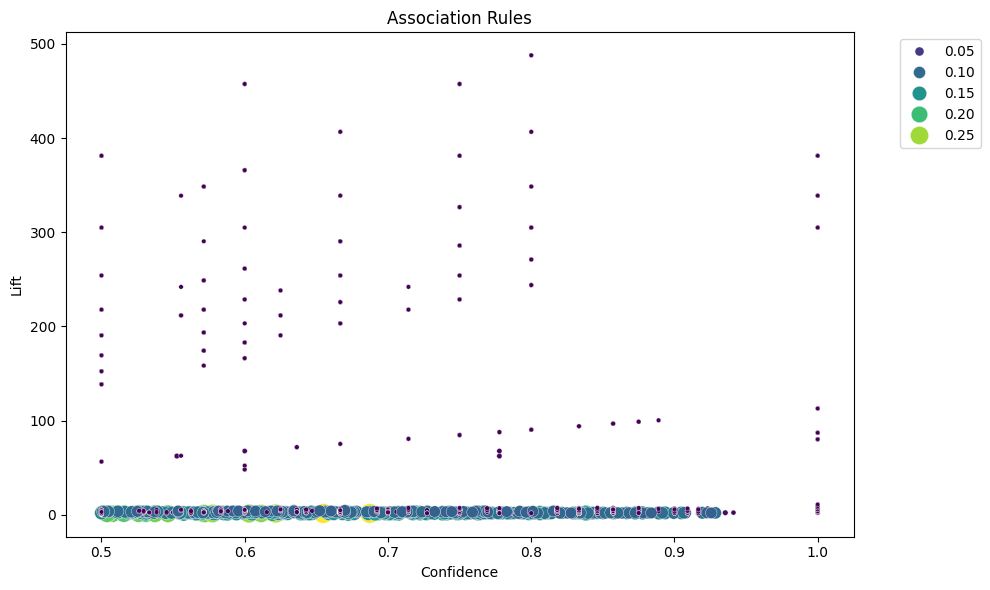

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rules with a minimum lift value for better visualization
rules_filtered = rules[rules['lift'] > 1].copy()

# Plot lift vs confidence, sized by support
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=rules_filtered,
    x='confidence',
    y='lift',
    size='support',
    sizes=(10, 200),
    hue='support',
    palette='viridis'
)

scatter.set_title('Association Rules')
scatter.set_xlabel('Confidence')
scatter.set_ylabel('Lift')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [80]:
import pandas as pd
import plotly.express as px

# Filter the top 20 rules by size
rules['rule_size'] = rules['lhs_size'] + rules['rhs_size']
top_rules = rules.nlargest(20, 'rule_size')

# Prepare data for plotting
top_rules['lhs'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['rhs'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Parallel coordinates plot using Plotly
fig = px.parallel_coordinates(
    top_rules,
    dimensions=['lhs', 'rhs', 'support', 'confidence', 'lift'],
    color='lift',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Top 20 Rules by Size (Parallel Coordinates Plot)'
)

fig.show()
